
---

# Prediction of Closing Price: A Comparative Approach

This notebook contains code for predicting the closing price using five different approaches:

- **Random Forest**
- **XGBoost**
- **Holt-Winters Model**
- **LSTM Neural Network**
- **Facebook Prophet Model**

## Steps to Run the Code
1. Please take into notice that the original csv data have been changed manually to and the all the columns leaving opening_price, closing_price and date have been shifted by one row to be considered as input for future prediction through past values.
2. Change the input file's address to match your dataset location.
3. Run all the cells in the notebook.

---

## Evaluation Metrics
The following evaluation metrics are used to assess the models:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in a set of predictions, without considering their direction. It is simple and easy to interpret.
- **Mean Squared Error (MSE)**: Similar to MAE but squares the errors before averaging, which penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE)**: Provides an indication of the magnitude of the residuals and emphasizes larger errors. A lower RMSE indicates better model fit.
- **Mean Absolute Percentage Error (MAPE)**: Measures the percentage error between predicted and actual values, useful for interpreting errors in relative terms.
- **Symmetric Mean Absolute Percentage Error (SMAPE)**: A variation of MAPE that symmetrically measures percentage errors, reducing bias and skewness caused by small actual values.
- **R-squared (R²)**: Represents the proportion of variance in the actual stock price that can be predicted from the model. A value closer to 1 means the model explains a large part of the variance.
- **Explained Variance Score (EVS)**: Measures the variance captured by the model, where a score of 1 indicates perfect prediction.
- **Directional Accuracy (DA)**: Evaluates how well the model predicts the direction (up or down) of stock prices, rather than the exact value.

---

## Flow of the Notebook
1. **Understanding the Data and Exploratory Data Analysis (EDA)**:
   - Initial analysis of the data.
   - Handling missing values and duplicates.

2. **Data Visualization**:
   - Visualization of the data with different combinations of columns to understand relationships.

3. **Understanding ACF, PACF, Seasonality, Trend, Outlier Detection, and Stationarity**:
   - A comprehensive analysis of various plots to assess the nature of the data:
     - **ACF (Autocorrelation Function)**
     - **PACF (Partial Autocorrelation Function)**
     - **Seasonality and Trend**
     - **Outlier Detection**
     - **Stationarity Plots**

4. **Feature Engineering**:
   - Feature engineering based on domain knowledge, which is crucial for making accurate predictions.

5. **Input Preparation**:
   - Preprocessing steps and preparation of the data for input into the models.

---

## Model Selection
- **XGBoost & Random Forest**:  
   These models are ideal for working with tabular data, especially when the main objective is to achieve high performance and accurate results. These models set a benchmark for comparison.
  
- **LSTM Neural Networks**:  
   LSTM models are well-suited for sequential data and are used to capture temporal dependencies.

- **Holt-Winters Model**:  
   This time series model only uses value and date as input. It performs well for short-term predictions.

- **Facebook Prophet Model**:  
   A more advanced time series model that considers external factors, such as holidays, which might affect performance but are not included in other models.

---

## Evaluation Metrics Overview
- **Mean Absolute Error (MAE)**: Measures average error magnitude.
- **Mean Squared Error (MSE)**: Penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE)**: Emphasizes large errors.
- **Mean Absolute Percentage Error (MAPE)**: Evaluates percentage errors.
- **Symmetric MAPE (SMAPE)**: Provides normalized percentage errors.
- **R-squared (R²)**: Proportion of variance explained by the model.
- **Explained Variance Score (EVS)**: Variance captured by the model.
- **Directional Accuracy (DA)**: Accuracy in predicting the direction of stock price movements.

--- 




<h1> Data Understanding and EDA</h1>

The values of all the columns except date and closing price have been shifted by 1 in downward direction in the dataset manually for only to be fed in XGboost and Random Forest.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\Atharva Bhattad\Downloads\業務体験課題\stock_price for rf.csv")

In [4]:
data.head(8)

date  closing_price  opening_price  high_value  low_value  \
0  12-02-1987          182.4          182.4       182.4      182.4   
1  13-02-1987          172.5          176.5       182.4      182.4   
2  16-02-1987          175.5          166.7       176.5      172.5   
3  17-02-1987          182.4          176.5       175.5      165.7   
4  18-02-1987          191.2          186.3       184.3      175.5   
5  19-02-1987          196.1          196.1       191.2      186.3   
6  20-02-1987          210.8          200.0       196.1      193.1   
7  23-02-1987          235.3          214.7       211.8      200.0   

   trading_volume  change_rate  
0         1280.00        16.25  
1         1280.00        16.25  
2          422.38        -5.43  
3          360.51         1.74  
4          881.51         3.93  
5          795.09         4.82  
6          748.25         2.56  
7          902.27         7.50

In [5]:
data.tail(1)

date  closing_price  opening_price  high_value  low_value  \
9202  NaN            NaN            NaN         NaN        NaN   

      trading_volume  change_rate  
9202             NaN          NaN

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9203 entries, 0 to 9202
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            9202 non-null   object 
 1   closing_price   9202 non-null   float64
 2   opening_price   9202 non-null   float64
 3   high_value      9202 non-null   float64
 4   low_value       9202 non-null   float64
 5   trading_volume  9202 non-null   float64
 6   change_rate     9202 non-null   float64
dtypes: float64(6), object(1)
memory usage: 503.4+ KB


In [7]:
data.describe()

closing_price  opening_price   high_value    low_value  trading_volume  \
count    9202.000000    9202.000000  9202.000000  9202.000000     9202.000000   
mean       92.180961      92.256183    93.178950    91.333004      172.798169   
std        50.452228      50.598215    51.053642    50.091852      125.655508   
min        33.000000      33.000000    33.200000    32.200000        9.340000   
25%        52.000000      52.100000    52.800000    51.500000       80.837500   
50%        85.100000      85.100000    86.050000    84.200000      154.030000   
75%       110.800000     110.800000   111.900000   109.275000      230.575000   
max       305.900000     309.800000   311.800000   303.900000     1280.000000   

       change_rate  
count  9202.000000  
mean      0.019546  
std       1.884089  
min     -14.740000  
25%      -0.940000  
50%       0.000000  
75%       0.900000  
max      16.250000

In [8]:
data.columns

Index(['date', 'closing_price', 'opening_price', 'high_value', 'low_value',
       'trading_volume', 'change_rate'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data['date'] = pd.to_datetime(data['date'],format = "%d-%m-%Y")

In [11]:
data.isnull().sum()  

date              1
closing_price     1
opening_price     1
high_value        1
low_value         1
trading_volume    1
change_rate       1
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data.isnull().sum()  

date              0
closing_price     0
opening_price     0
high_value        0
low_value         0
trading_volume    0
change_rate       0
dtype: int64

<h1>Data Visualisation</h1>

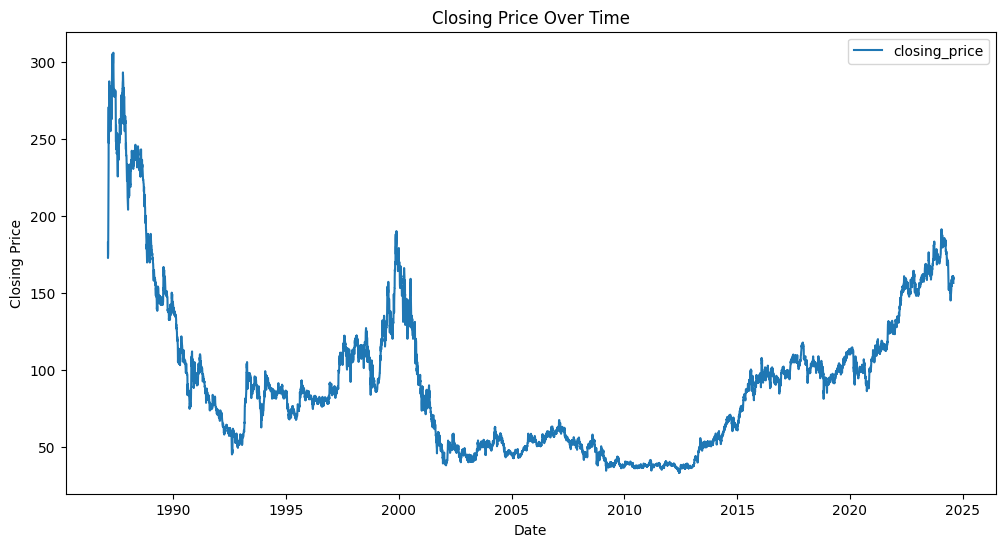

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['closing_price'],label='closing_price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()


In [137]:
plt.figure(figsize=(100,100))
plt.bar(data['date'], data['trading_volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()


In [138]:
plt.figure(figsize=(100, 100))
plt.scatter(data['trading_volume'], data['closing_price'], alpha=0.5)
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price')
plt.title('Scatter Plot of Trading Volume vs Closing Price')
plt.show()


In [139]:
import seaborn as sns

plt.figure(figsize=(100,100))
sns.lineplot(x='date', y='trading_volume', data=data)
plt.title('Closing Price Over Time')
plt.show()


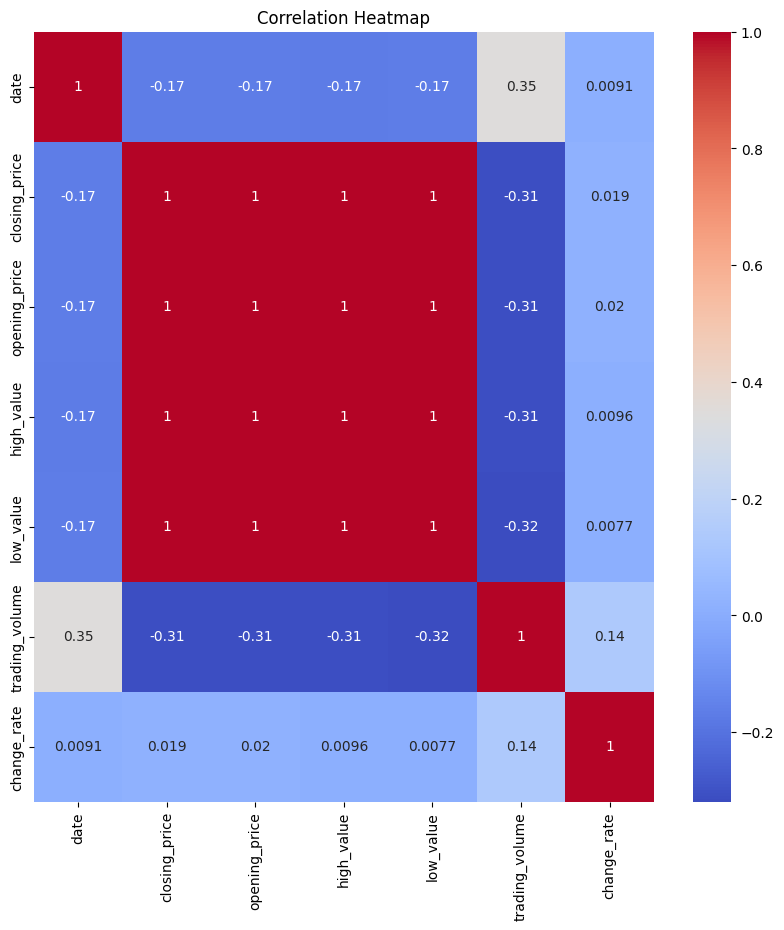

In [140]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [141]:
plt.figure(figsize=(100, 100))
sns.lineplot(x='date', y='closing_price', data=data)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Customized Plot of Closing Price Over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels
plt.show()


<h1>Understanding the acf,pacf,seasonality,trend and stationarity of data</h1>

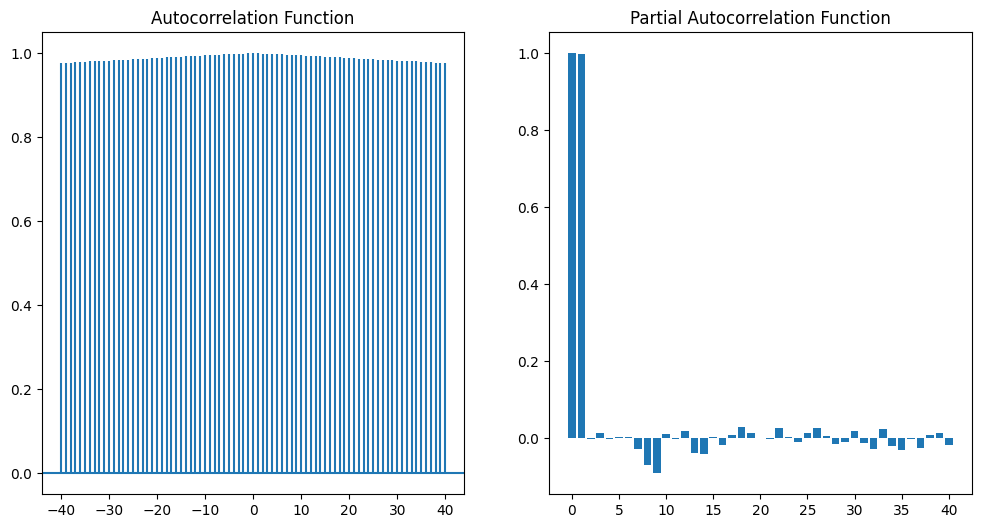

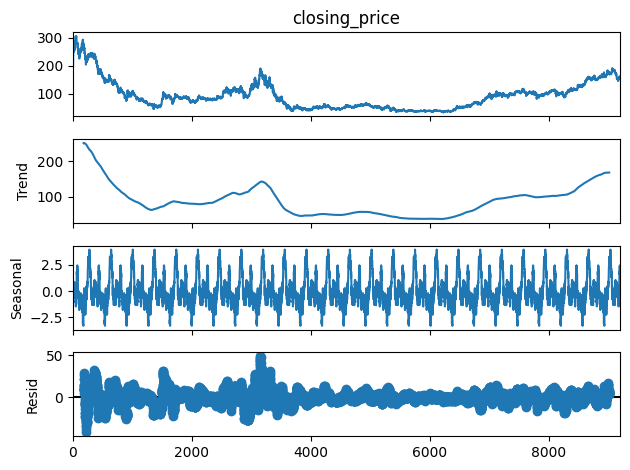

Detected Outliers:
8      270.6
9      252.9
10     247.1
11     253.9
12     263.7
       ...  
301    244.1
302    246.1
328    244.1
329    245.1
330    244.1
Name: closing_price, Length: 177, dtype: float64
ADF Statistic: -3.5831920709837752
p-value: 0.006090609914956961
Critical Values: {'1%': -3.4310622309108942, '5%': -2.8618547606156226, '10%': -2.5669375420141565}
The time series is stationary.


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample data loading
# data = pd.read_csv('your_data.csv')  # Load your data here

# Assuming `data` is your DataFrame
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=False)

# 1. ACF and PACF Plots
def plot_acf_pacf(series, lags=40):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.title('Autocorrelation Function')
    plt.acorr(series, maxlags=lags)
    plt.subplot(122)
    plt.title('Partial Autocorrelation Function')
    plt.bar(range(len(pacf(series, nlags=lags))), pacf(series, nlags=lags))
    plt.show()

# Assuming 'closing_price' is your target time series
plot_acf_pacf(data['closing_price'])

# 2. Trend and Seasonality
def decompose_time_series(series):
    decomposition = seasonal_decompose(series, model='additive', period=365)  # Adjust period based on your data
    decomposition.plot()
    plt.show()

decompose_time_series(data['closing_price'])

# 3. Outlier Detection
def detect_outliers(series):
    mean = np.mean(series)
    std_dev = np.std(series)
    threshold = 3  # You can adjust this threshold
    outliers = series[(series < mean - threshold * std_dev) | (series > mean + threshold * std_dev)]
    return outliers

outliers = detect_outliers(data['closing_price'])
print("Detected Outliers:")
print(outliers)

# 4. ADF Test for Stationarity
adf_result = adfuller(data['closing_price'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

if adf_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


<h1>Feature engineering</h1>

In [15]:
data['price_Diff'] = data['closing_price'] - data['opening_price']

In [16]:
# Calculation of moving averages
data['MA_5'] = data['closing_price'].rolling(window=5).mean()
data['MA_10'] = data['closing_price'].rolling(window=10).mean()
data['MA_20'] = data['closing_price'].rolling(window=20).mean()  
data['MA_50'] = data['closing_price'].rolling(window=50).mean()  
data['MA_100'] = data['closing_price'].rolling(window=100).mean()  
data['MA_200'] = data['closing_price'].rolling(window=200).mean()  
data['MA_365'] = data['closing_price'].rolling(window=365).mean() 


This method is particularly useful for reducing noise and capturing trends or patterns over time.This is for short term and long term trends.They have been further used in MACD(Moving Average Convergence Divergence).It helps identify the momentum and direction of the price movement.

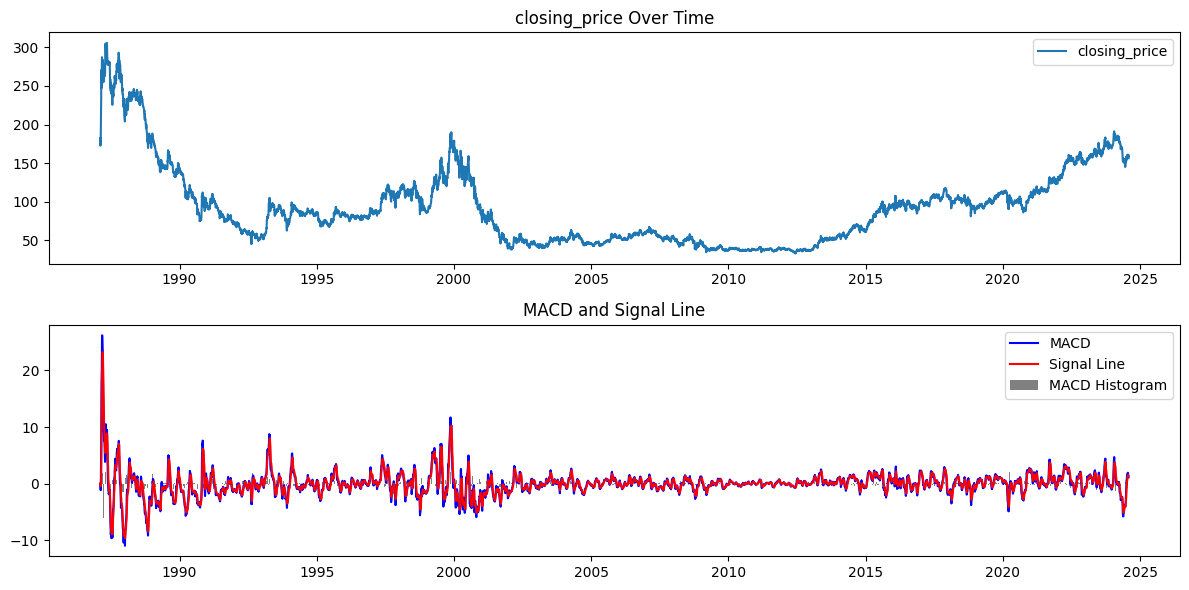

In [18]:
data['EMA_12'] = data['closing_price'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['closing_price'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

data['MACD_Histogram'] = data['MACD'] - data['Signal_Line']


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['date'], data['closing_price'], label='closing_price')
plt.title('closing_price Over Time')
plt.legend()

# Plot
plt.subplot(2, 1, 2)
plt.plot(data['date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['date'], data['Signal_Line'], label='Signal Line', color='red')
plt.bar(data['date'], data['MACD_Histogram'], label='MACD Histogram', color='gray')
plt.title('MACD and Signal Line')
plt.legend()

plt.tight_layout()
plt.show()


In [19]:
data['daily_range'] = data['high_value'] - data['low_value']

Data volatility refers to the rate at which data changes over time.Here it indicates how frequently and unpredictably data values are updated, modified, or fluctuate

In [20]:
data['volatility'] = (data['high_value'] - data['low_value']) / data['opening_price'] * 100


The change rate percentage is critical for trend analysis and decision-making.Here this feature tells about the return on investment.
For example, if the return over 3 days is 5%, 2%, and -1%, the cumulative return is:
(1+0.05)*(1+0.02)*(1-0.01) = (1.05)*(1.02)*(0.99)

In [21]:
data['Cumulative_Return'] = (1 + data['change_rate']/100).cumprod()


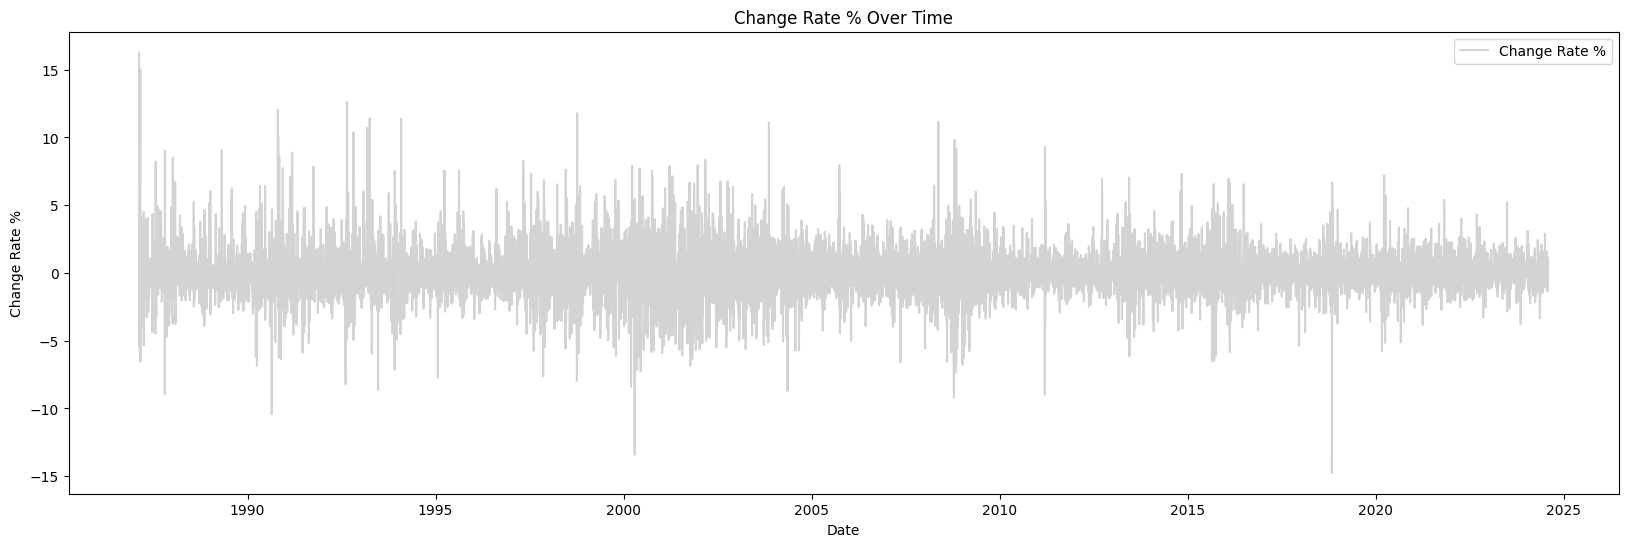

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(data['date'], data['change_rate'], label='Change Rate %', color='#D3D3D3')
plt.xlabel('Date')
plt.ylabel('Change Rate %')
plt.title('Change Rate % Over Time')
plt.legend()
plt.show()


Beta: Measures the volatility of the asset relative to the overall market. A beta greater than 1 indicates higher volatility than the market.

Sharpe Ratio: Measures the risk-adjusted return of an investment. It compares the return of an investment to its risk.

Win Rate: Measures the percentage of profitable trades compared to total trades.

These all can also be used but are not used here.

In [25]:
data.columns

Index(['date', 'closing_price', 'opening_price', 'high_value', 'low_value',
       'trading_volume', 'change_rate', 'price_Diff', 'MA_5', 'MA_10', 'MA_20',
       'MA_50', 'MA_100', 'MA_200', 'MA_365', 'EMA_12', 'EMA_26', 'MACD',
       'Signal_Line', 'MACD_Histogram', 'daily_range', 'volatility',
       'Cumulative_Return'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9202 entries, 0 to 9201
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               9202 non-null   datetime64[ns]
 1   closing_price      9202 non-null   float64       
 2   opening_price      9202 non-null   float64       
 3   high_value         9202 non-null   float64       
 4   low_value          9202 non-null   float64       
 5   trading_volume     9202 non-null   float64       
 6   change_rate        9202 non-null   float64       
 7   price_Diff         9202 non-null   float64       
 8   MA_5               9198 non-null   float64       
 9   MA_10              9193 non-null   float64       
 10  MA_20              9183 non-null   float64       
 11  MA_50              9153 non-null   float64       
 12  MA_100             9103 non-null   float64       
 13  MA_200             9003 non-null   float64       
 14  MA_365       

<h1>Input preparation</h1>

In [34]:
features = ['opening_price', 'high_value', 'low_value',
       'trading_volume', 'change_rate', 'MA_5', 'MA_10', 'MA_20',
       'MA_50', 'MA_100', 'MA_200', 'MA_365', 'EMA_12', 'EMA_26', 'MACD',
       'Signal_Line', 'MACD_Histogram', 'daily_range', 'volatility',
       'Cumulative_Return']
X = data[features]
y = data['closing_price']
X_train = X[365:8500]
X_test = X[8500:]
y_train = y[365:8500]
y_test = y[8500:]

<h1>XGboost Approach</h1>

In [35]:
from xgboost import XGBRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,mean_absolute_error
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)


In [36]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import numpy as np

# Function to calculate SMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Function to calculate Directional Accuracy (DA)
def directional_accuracy(y_true, y_pred):
    correct_directions = np.sum(np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred)))
    return (correct_directions / (len(y_true) - 1)) * 100


xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mape = mean_absolute_percentage_error(y_test, y_pred)
xgb_evs = explained_variance_score(y_test, y_pred)
xgb_smape = smape(y_test, y_pred)
xgb_da = directional_accuracy(y_test, y_pred)


print(f"XGBoost Mean Squared Error (MSE): {xgb_mse}")
print(f"XGBoost Mean Absolute Error (MAE): {xgb_mae}")
print(f"XGBoost Root Mean Squared Error (RMSE): {xgb_rmse}")
print(f"XGBoost Mean Absolute Percentage Error (MAPE): {xgb_mape}")
print(f"XGBoost Symmetric Mean Absolute Percentage Error (SMAPE): {xgb_smape}")
print(f"XGBoost R-squared (R²): {xgb_r2}")
print(f"XGBoost Explained Variance Score (EVS): {xgb_evs}")
print(f"XGBoost Directional Accuracy (DA): {xgb_da}%")


XGBoost Mean Squared Error (MSE): 7.026622220207125
XGBoost Mean Absolute Error (MAE): 1.8205951853695077
XGBoost Root Mean Squared Error (RMSE): 2.6507776632918736
XGBoost Mean Absolute Percentage Error (MAPE): 0.01144834500024653
XGBoost Symmetric Mean Absolute Percentage Error (SMAPE): 1.1462958170595081
XGBoost R-squared (R²): 0.9723002824771251
XGBoost Explained Variance Score (EVS): 0.9731736220289554
XGBoost Directional Accuracy (DA): 55.92011412268189%


In [37]:
results = pd.DataFrame({
    'Actual Values (y_test)': y_test,
    'Predicted Values (y_pred)': y_pred
})

# Print the DataFrame
print(results)

      Actual Values (y_test)  Predicted Values (y_pred)
8500                   127.2                 127.298965
8501                   129.7                 124.899574
8502                   128.0                 128.486755
8503                   128.3                 127.296043
8504                   124.8                 124.582283
...                      ...                        ...
9197                   157.9                 158.909393
9198                   159.7                 158.500214
9199                   158.7                 158.194931
9200                   160.4                 158.099228
9201                   156.3                 159.225784

[702 rows x 2 columns]


              Feature  Importance
0       opening_price    0.865722
5                MA_5    0.081169
2           low_value    0.023113
12             EMA_12    0.010165
6               MA_10    0.008945
1          high_value    0.006120
19  Cumulative_Return    0.002062
7               MA_20    0.000745
14               MACD    0.000433
16     MACD_Histogram    0.000234
15        Signal_Line    0.000177
3      trading_volume    0.000142
13             EMA_26    0.000135
4         change_rate    0.000128
8               MA_50    0.000126
9              MA_100    0.000120
10             MA_200    0.000117
17        daily_range    0.000116
18         volatility    0.000116
11             MA_365    0.000115


<Figure size 1000x600 with 0 Axes>

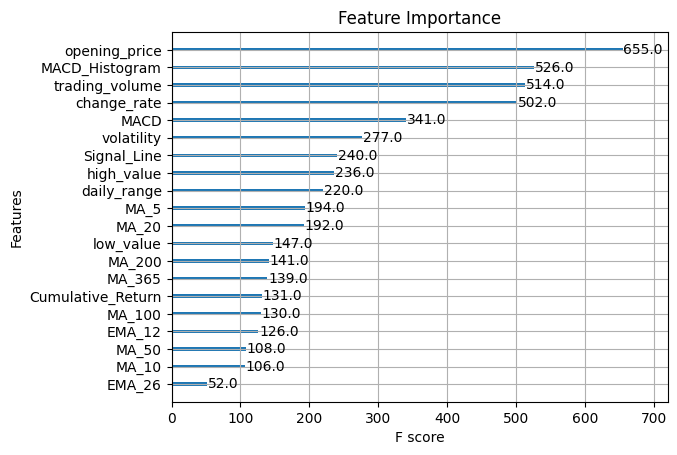

In [38]:
from xgboost import plot_importance

importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

<h1>Random Forest Approach</h1>

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,mean_absolute_error
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)


In [33]:


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score# Mean Squared Error (MSE)

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def directional_accuracy(y_true, y_pred):
    correct_directions = np.sum(np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred)))
    return (correct_directions / (len(y_true) - 1)) * 100

rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mape = mean_absolute_percentage_error(y_test, y_pred)
rf_evs = explained_variance_score(y_test, y_pred)
rf_smape = smape(y_test, y_pred)
rf_da = directional_accuracy(y_test, y_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Random Forest Mean Absolute Percentage Error (MAPE): {rf_mape}")
print(f"Random Forest R-squared (R²): {rf_r2}")
print(f"Random Forest Explained Variance Score (EVS): {rf_evs}")
print(f"Random Forest Directional Accuracy (DA): {rf_da}%")

Random Forest Mean Squared Error (MSE): 3.531443076923173
Random Forest Mean Absolute Error (MAE): 1.4794273504273732
Random Forest Root Mean Squared Error (RMSE): 1.8792134197379426
Random Forest Mean Absolute Percentage Error (MAPE): 0.009426378551745019
Random Forest R-squared (R²): 0.9860786630313533
Random Forest Explained Variance Score (EVS): 0.9889871816617127
Random Forest Directional Accuracy (DA): 58.77318116975749%


<h1>LSTM Approach</h1>

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2



features = ['opening_price', 'high_value', 'low_value', 'trading_volume', 'change_rate', 
            'MA_5', 'MA_10', 'MA_20', 'MA_50', 'MA_100', 'MA_200', 'MA_365', 'EMA_12', 
            'EMA_26', 'MACD', 'Signal_Line', 'MACD_Histogram', 'daily_range', 
            'volatility', 'Cumulative_Return']
target = 'closing_price' 

num_features = len(features)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features + [target]])


scaled_df = pd.DataFrame(scaled_data, columns=features + [target], index=data.index)


sequence_length = 60  

def create_sequences(data, target_column, sequence_length):
    sequences = []
    targets = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i])  
        targets.append(data[i, target_column])       
    return np.array(sequences), np.array(targets)

X, y = create_sequences(scaled_data, target_column=len(features), sequence_length=sequence_length)

X_train = X[365:9000]
X_test =  X[9000:9200]
y_train = y[365:9000]
y_test = y[9000:9200]
X_valid = X[9200:]
y_valid = y[9200:]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build LSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True, kernel_regularizer=l2(0.01)), 
                        input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_valid, y_valid))
predicted_values = model.predict(X_test)

predicted_values_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], predicted_values], axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :-1], y_test.reshape(-1, 1)], axis=1))[:, -1]



Epoch 1/100


c:\Users\Atharva Bhattad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - loss: 0.8073
Epoch 2/100


c:\Users\Atharva Bhattad\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - loss: 0.7615
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step - loss: 0.7309
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 437ms/step - loss: 0.7011
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - loss: 0.6723
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 441ms/step - loss: 0.6448
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - loss: 0.6181
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 427ms/step - loss: 0.5924
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - loss: 0.5677
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - loss: 0.5438
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 401ms/step - loss: 0.5209
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 409ms/step - loss: 0.4987
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 426ms/step - loss: 0.4775
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - loss: 0.4570
Epoch 15/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 404ms/step - loss: 0.4372
Epoch 16/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 428ms/step

In [40]:

da = pd.DataFrame({
    'p_actual': y_test_rescaled,
    'p_pred': predicted_values_rescaled
})

print(da)
da.to_excel("LSTM.xlsx")


     p_actual      p_pred
0       173.9  166.533048
1       175.1  166.908966
2       176.9  167.469561
3       180.6  168.129534
4       180.4  169.115935
..        ...         ...
137     157.9  156.210535
138     159.7  156.016245
139     158.7  155.859748
140     160.4  155.882472
141     156.3  155.645028

[142 rows x 2 columns]


In [41]:
lstm_mse = mean_squared_error(y_test_rescaled, predicted_values_rescaled)
lstm_mae = mean_absolute_error(y_test_rescaled, predicted_values_rescaled)
lstm_r2 = r2_score(y_test_rescaled, predicted_values_rescaled)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, predicted_values_rescaled)
lstm_evs = explained_variance_score(y_test_rescaled, predicted_values_rescaled)
lstm_smape = smape(y_test_rescaled, predicted_values_rescaled)
lstm_da = directional_accuracy(y_test_rescaled, predicted_values_rescaled)

print(f"LSTM Mean Squared Error (MSE): {lstm_mse}")
print(f"LSTM Mean Absolute Error (MAE): {lstm_mae}")
print(f"LSTM Root Mean Squared Error (RMSE): {lstm_rmse}")
print(f"LSTM Mean Absolute Percentage Error (MAPE): {lstm_mape}")
print(f"LSTM Symmetric Mean Absolute Percentage Error (SMAPE): {lstm_smape}")
print(f"LSTM R-squared (R²): {lstm_r2}")
print(f"LSTM Explained Variance Score (EVS): {lstm_evs}")
print(f"LSTM Directional Accuracy (DA): {lstm_da}%")

LSTM Mean Squared Error (MSE): 31.918277090781366
LSTM Mean Absolute Error (MAE): 4.665140579200134
LSTM Root Mean Squared Error (RMSE): 5.649626278859635
LSTM Mean Absolute Percentage Error (MAPE): 0.02708712283055376
LSTM Symmetric Mean Absolute Percentage Error (SMAPE): 2.7548039819403893
LSTM R-squared (R²): 0.8263005213275882
LSTM Explained Variance Score (EVS): 0.9102673850140732
LSTM Directional Accuracy (DA): 51.77304964539007%


In [42]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


<h1>Holt's Winter Model for Closing Price Prediction</h1>

      date  actual_closing_price  predicted_closing_price
9190  9190                 159.7               156.517682
9191  9191                 160.8               156.570690
9192  9192                 159.0               156.541283
9193  9193                 159.9               157.686877
9194  9194                 160.7               157.589222
9195  9195                 158.5               157.744789
9196  9196                 158.1               158.807505
9197  9197                 157.9               158.661817
9198  9198                 159.7               158.932720
9199  9199                 158.7               158.610465
9200  9200                 160.4               159.516017
9201  9201                 156.3               158.953865


c:\Users\Atharva Bhattad\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


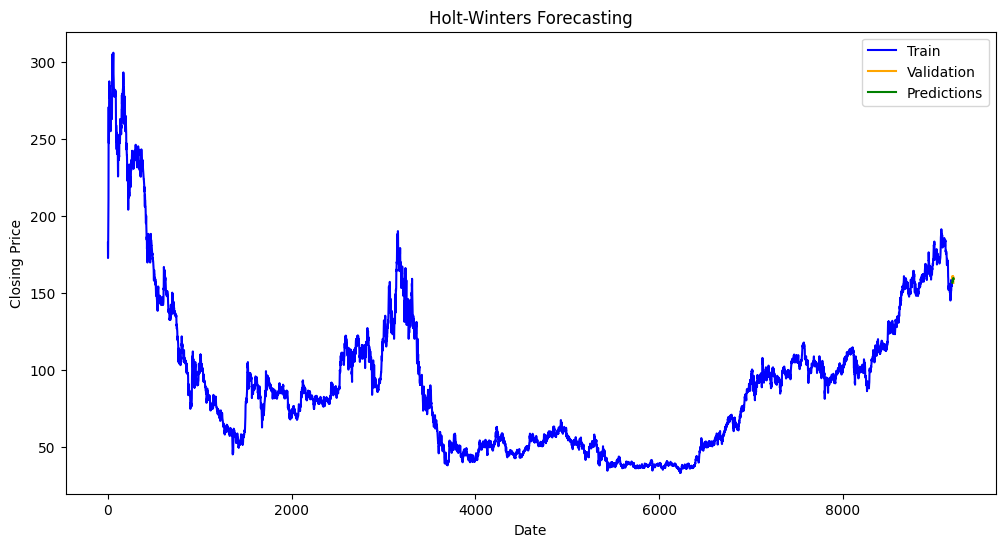

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error


train_size = 9190 
train = data[:train_size]

model = ExponentialSmoothing(
    train['closing_price'],
    trend='add',  
    seasonal='mul',  
    seasonal_periods=365  # as data in days
)

hw_fit = model.fit()


validation = data[9190:] 
predictions_validation = hw_fit.forecast(len(validation))

validation_results = pd.DataFrame({
    'date': validation.index,  
    'actual_closing_price': validation['closing_price'].values, 
    'predicted_closing_price': predictions_validation
})


print(validation_results)

plt.figure(figsize=(12, 6))
plt.plot(train['closing_price'], label='Train', color='blue')
plt.plot(validation['closing_price'], label='Validation', color='orange')
plt.plot(predictions_validation, label='Predictions', color='green')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


<h3>If we only predict for next day or few days then this model works very good.</h3>

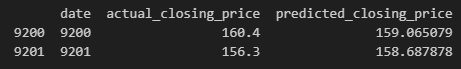

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import numpy as np

actual_closing_price = validation['closing_price'].values
predicted_closing_price = predictions_validation  

hw_mse = mean_squared_error(actual_closing_price, predicted_closing_price)
hw_mae = mean_absolute_error(actual_closing_price, predicted_closing_price)
hw_r2 = r2_score(actual_closing_price, predicted_closing_price)
hw_rmse = np.sqrt(hw_mse)
hw_mape = mean_absolute_percentage_error(actual_closing_price, predicted_closing_price)
hw_evs = explained_variance_score(actual_closing_price, predicted_closing_price)
hw_smape = smape(actual_closing_price, predicted_closing_price)
hw_da = directional_accuracy(actual_closing_price, predicted_closing_price)


print(f"Holt-Winters Mean Squared Error (MSE): {hw_mse}")
print(f"Holt-Winters Mean Absolute Error (MAE): {hw_mae}")
print(f"Holt-Winters Root Mean Squared Error (RMSE): {hw_rmse}")
print(f"Holt-Winters Mean Absolute Percentage Error (MAPE): {hw_mape}")
print(f"Holt-Winters Symmetric Mean Absolute Percentage Error (SMAPE): {hw_smape}")
print(f"Holt-Winters R-squared (R²): {hw_r2}")
print(f"Holt-Winters Explained Variance Score (EVS): {hw_evs}")
print(f"Holt-Winters Directional Accuracy (DA): {hw_da}%")


Holt-Winters Mean Squared Error (MSE): 4.892231797032306
Holt-Winters Mean Absolute Error (MAE): 1.817786701000048
Holt-Winters Root Mean Squared Error (RMSE): 2.2118390079371295
Holt-Winters Mean Absolute Percentage Error (MAPE): 0.01140117173518037
Holt-Winters Symmetric Mean Absolute Percentage Error (SMAPE): 1.1470419151782363
Holt-Winters R-squared (R²): -2.043510514419381
Holt-Winters Explained Variance Score (EVS): -1.2483089739617066
Holt-Winters Directional Accuracy (DA): 72.72727272727273%


In [45]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


<h1>Facebook Prophet Model</h1>

In [46]:
df = data[['date', 'closing_price']]
df.columns = ['ds', 'y']
df

ds      y
0    1987-02-12  182.4
1    1987-02-13  172.5
2    1987-02-16  175.5
3    1987-02-17  182.4
4    1987-02-18  191.2
...         ...    ...
9197 2024-07-26  157.9
9198 2024-07-29  159.7
9199 2024-07-30  158.7
9200 2024-07-31  160.4
9201 2024-08-01  156.3

[9202 rows x 2 columns]

This model didn't gave better performance for long term so was tested on short term.

11:24:37 - cmdstanpy - INFO - Chain [1] start processing
11:24:41 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Atharva Bhattad\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Atharva Bhattad\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


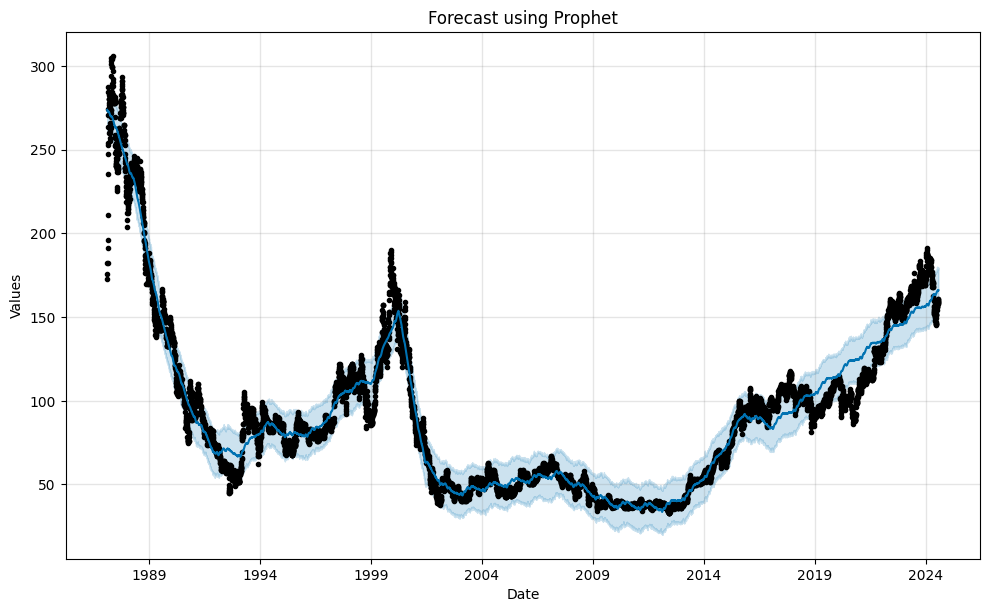

In [47]:
from prophet import Prophet\

train_size = 9200 
train= df[:train_size]
# Step 2: Initialize the Prophet model
model = Prophet()

# Step 3: Fit the model
model.fit(train)

# Step 4: Create a dataframe for future predictions
future = model.make_future_dataframe(periods=2)  # Forecast for the next 2 day

forecast = model.predict(future)


fig = model.plot(forecast)
plt.title("Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()


In [48]:
print(forecast.tail(2))

             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
9200 2024-07-31  147.853424  152.347296  178.744367   147.853424   147.853424   
9201 2024-08-01  147.882195  152.272740  179.425424   147.882195   147.882195   

      additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
9200       18.098270             18.098270             18.098270  16.277014   
9201       18.052392             18.052392             18.052392  16.248827   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
9200     16.277014     16.277014  1.821255      1.821255      1.821255   
9201     16.248827     16.248827  1.803565      1.803565      1.803565   

      multiplicative_terms  multiplicative_terms_lower  \
9200                   0.0                         0.0   
9201                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
9200                         0.0  165.951693  
9201                      

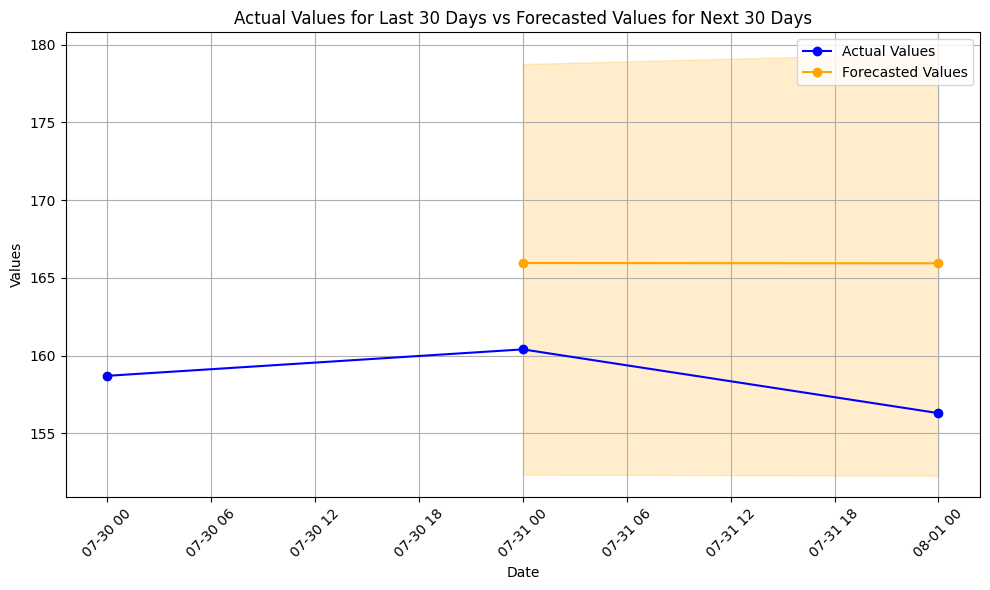

In [49]:
actual_last_30_days = df[df['ds'] >= df['ds'].max() - pd.Timedelta(days=2)]
plt.figure(figsize=(10, 6))
plt.plot(actual_last_30_days['ds'], actual_last_30_days['y'], label='Actual Values', marker='o', color='blue')
plt.plot(forecast['ds'][-2:], forecast['yhat'][-2:], label='Forecasted Values', marker='o', color='orange')
plt.fill_between(forecast['ds'][-2:], forecast['yhat_lower'][-2:], forecast['yhat_upper'][-2:], color='orange', alpha=0.2)


plt.title('Actual Values for Last 30 Days vs Forecasted Values for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **THE BEST RESULTS WERE OBTAINED IN: RANDOM FOREST >> XGBOOST >> HOLT'S WINTER >> LSTM >> FACEBOOK PROPHET** 